#### Assignment -1

#### project name : Sentimental Analysis on comments data

Aim : Use comments data provided to arrive at a sentiment of the audience on given post. Use
sample from attached sheet “Comment analysis”

In [2]:
from flask_mysqldb import MySQL

In [1]:
### Importing the libraries 
import pandas as pd
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
import nltk
import nltk_data


In [2]:
xls = pd.ExcelFile('comments.xlsx') # reading the data
comment = pd.read_excel(xls, 'Comment analysis')
# df2 = pd.read_excel(xls, 'Sheet2')

In [3]:
comment

,Comment
0,OMG i never Belive that i will be able to loss...
1,@plumbodylovin great giveaway lol... I was ski...
2,I dont believe in body shaming at all\t\t\t\t\...
3,Eve i had faced bodyshaming but I don't care n...
4,Same i was under wait till my school days and ...
...,...
146,This red lipstick looks beautiful on you\t\t\t...
147,i will surely participate. you are looking stu...
148,I love the red shade\t\t\t\t\t\t\t\t\t\t\t\t\t...
149,So beautiful neck pc. Style\t\t\t\t\t\t\t\t\t\...


### 1. Data Labelling
 

The dataset is unlabelled because of using API, you can only extract the comments but not the polarity. Polarity is something that can identify the emotion of a particular sentence by using the words present in that. This can be done using the TextBlob module of python, which provides a function to find polarity as follows,

In [4]:
comment['polarity'] = comment['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [5]:
comment

,Comment,polarity
0,OMG i never Belive that i will be able to loss...,0.333125
1,@plumbodylovin great giveaway lol... I was ski...,0.355313
2,I dont believe in body shaming at all\t\t\t\t\...,0.000000
3,Eve i had faced bodyshaming but I don't care n...,0.000000
4,Same i was under wait till my school days and ...,-0.350000
...,...,...
146,This red lipstick looks beautiful on you\t\t\t...,0.425000
147,i will surely participate. you are looking stu...,0.500000
148,I love the red shade\t\t\t\t\t\t\t\t\t\t\t\t\t...,0.250000
149,So beautiful neck pc. Style\t\t\t\t\t\t\t\t\t\...,0.850000


As TextBlob find the polarity score, now using threshold concept you can extract a new feature, i.e., sentiment of each comment either positive (1) or negative (-1) as seen in below one: 

In [6]:
comment.loc[comment['polarity'] <= 0, 'pol_cat'] = -1 
comment.loc[comment['polarity'] > 0, 'pol_cat'] = 1 

In [7]:
import matplotlib.pyplot as plt

In [48]:
graph = comment.pol_cat.map({-1: 'Negative', 1: 'Postive'})

In [47]:
graph.value_counts()

Psotive     114
Negative     37
Name: pol_cat, dtype: int64

Text(0.5, 1.0, 'Distribution of postive and  negative comments')

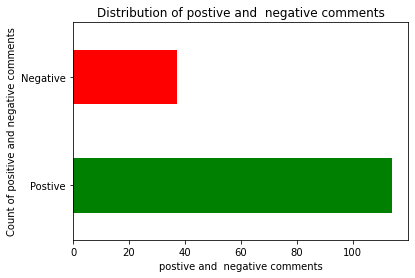

In [51]:
graph.value_counts().plot(kind = 'barh', color = ['green', 'red'])
plt.xlabel('postive and  negative comments')
plt.ylabel('Count of positive and negative comments')
plt.title('Distribution of postive and  negative comments')
# plt.legend(['+1 :poitive'])


### 2. LowerCase the Comments
 

Now moving further with the data preprocessing step, lowercasing the words in every comment. It becomes important as it makes the data more effective to produce a better result but if not converted then the system treats them as two different words which might be redundant information and led to producing different results than the desired one.

In [9]:
comment['Comment'] = comment['Comment'].str.lower()

In [10]:
comment.head(4)

,Comment,polarity,pol_cat
0,omg i never belive that i will be able to loss...,0.333125,1.0
1,@plumbodylovin great giveaway lol... i was ski...,0.355313,1.0
2,i dont believe in body shaming at all\t\t\t\t\...,0.000000,-1.0
3,eve i had faced bodyshaming but i don't care n...,0.000000,-1.0



### 3. Strip
 

Now using strip() method by python, remove all the trailing spaces from the comments.

In [11]:
comment.Comment = comment.Comment.str.strip()

### 4. Stop Words
 


In [12]:
from nltk.corpus import stopwords
from nltk import word_tokenize

In [13]:
stop_words = set(stopwords.words('english'))

In [14]:
def remove_stopwords(line):
    word_tokens = word_tokenize(line)
    filtered_sentence = [w for w in word_tokens if w in stop_words]
    return " ".join(filtered_sentence)

In [15]:
comment['stop_comments'] = comment['Comment'].apply(lambda x: remove_stopwords(x))

In [16]:
comment

,Comment,polarity,pol_cat,stop_comments
0,omg i never belive that i will be able to loss...,0.333125,1.0,i that i will be to again i have by to and so ...
1,@plumbodylovin great giveaway lol... i was ski...,0.355313,1.0,i was in i to you how i to so
2,i dont believe in body shaming at all,0.000000,-1.0,i in at all
3,eve i had faced bodyshaming but i don't care n...,0.000000,-1.0,i had but i do now
4,same i was under wait till my school days and ...,-0.350000,-1.0,same i was under my and being was a
...,...,...,...,...
146,this red lipstick looks beautiful on you,0.425000,1.0,this on you
147,i will surely participate. you are looking stu...,0.500000,1.0,i will you are
148,i love the red shade,0.250000,1.0,i the
149,so beautiful neck pc. style,0.850000,1.0,so


### Data spilting :

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
comment.columns


Index(['Comment', 'polarity', 'pol_cat', 'stop_comments'], dtype='object')

In [19]:
trainX, testX, trainY, testY =train_test_split(comment['stop_comments'], comment.pol_cat)

###  Feature Extraction from Text Data

Tokenization: Tokenize the text into words,

Vocabulary: Build vocabulary with all the words present in the text/document,

Encoding: Encode the entire document creating a vector with the same length as of vocabulary.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
vect = CountVectorizer()
tf_train = vect.fit_transform(trainX)
tf_test = vect.transform(testX)

In [22]:
tf_test.shape

(38, 65)

### Sentimental Analysis:

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
le = LogisticRegression()

In [25]:
le.fit(tf_train, trainY)

LogisticRegression()

In [26]:
le.score(tf_train, trainY)

0.8761061946902655

Now after the model training, the accuracy score on the training dataset is 87.7 %, which implies your model is predicting 87.7 % accurate results, which is quite good. In the next step, you can discover the accuracy score on the test dataset,

In [27]:
le.score(tf_test, testY)

0.7631578947368421


The accuracy of the model on the test dataset is 81.5 %, which means the model is predicting 81.5 % accurate results on the unseen dataset.

Make predictions on the test dataset by using a model trained above, using the below cell.




In [56]:
from sklearn.model_selection import GridSearchCV

In [61]:
params = {'C': [0.001,0.01, 1,10,100,1000]}
gs = GridSearchCV(le, params, n_jobs=1, cv=5)

gs.fit(tf_train, trainY)


/home/paramathma/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/paramathma/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [0.001, 0.01, 1, 10, 100, 1000]})

In [63]:
print(classification_report(gs.predict(tf_test), testY))

              precision    recall  f1-score   support

        -1.0       0.20      0.67      0.31         3
         1.0       0.96      0.77      0.86        35

    accuracy                           0.76        38
   macro avg       0.58      0.72      0.58        38
weighted avg       0.90      0.76      0.81        38



### Confusion matrix

It will help the developers to know about the performance of their model on the test dataset where they already have the output of the same.

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_pred=le.predict(tf_test), y_true=testY)

array([[ 2,  8],
       [ 1, 27]])

In [30]:
import matplotlib.pyplot as plt

In [31]:
from sklearn.metrics import plot_confusion_matrix

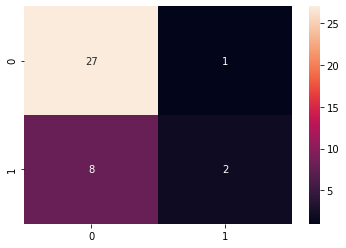

In [32]:
cf = confusion_matrix(y_pred=le.predict(tf_test), y_true=testY, labels = [1,-1])

import seaborn as sns
sns.heatmap(cf, annot=True)

In [33]:
from sklearn.metrics import classification_report, f1_score

In [34]:
print(classification_report(le.predict(tf_test), testY))

              precision    recall  f1-score   support

        -1.0       0.20      0.67      0.31         3
         1.0       0.96      0.77      0.86        35

    accuracy                           0.76        38
   macro avg       0.58      0.72      0.58        38
weighted avg       0.90      0.76      0.81        38



In [35]:
f1_score(le.predict(tf_test), testY)

0.8571428571428572

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
re = RandomForestClassifier()
re.fit(tf_train, trainY)
re.score(tf_train, trainY)

0.9646017699115044

In [38]:
re.score(tf_test, testY)

0.7631578947368421

In [39]:
f1_score(y_pred=(re.predict(tf_test)), y_true = testY)

0.8571428571428572

 

### Conclusion
 

A machine learning model has been trained for the sentiment analysis of the youtube comments followed by the pre-processing of the dataset. Preprocessing includes data labeling, lowercasing of the text, stopwords removal, data splitting, feature extraction.


For the sentiment classification into two classes positive and negative, Logistic Regression, machine learning classification algorithm has been used & achieved an accuracy score of  87.7% on training data and 81 % on test data, and the F1 score is .892, which is obviously more reliable than accuracy.


For the sentiment classification into two classes positive and negative, Random forest Classifier, machine learning classification algorithm has been used & achieved an accuracy score of  94% on training data and 84 % on test data, and the F1 score is 90%, which is obviously more reliable than accuracy.

In [55]:
test1 = vect.transform(['this is very bad'])
re.predict(test1)

array([1.])